# Homework 2
#### Problem 1
Fix $\epsilon > 0$ and take $\vec{c} \in V$. Then choose some $\delta= \epsilon$ such that $$\| \vec{x} - \vec{c} \| < \delta.$$ Realize that:
$$
\|\vec{x}\| = \|\vec{x} - \vec{c} + \vec{c}\| \leq \|\vec{x}-\vec{c}\| + \|\vec{c}\| 
\implies \|\vec{x}\| - \|\vec{c}\| \leq \|\vec{x}-\vec{c}\|
$$
Similarly, we also get:
$$
\|\vec{c}\| = \|\vec{c} - \vec{x} + \vec{x}\| \leq \|\vec{c}-\vec{x}\| + \|\vec{x}\|
\implies \|\vec{c}\| - \|\vec{x}\| \leq \|\vec{x}-\vec{c}\|
$$
Thus, $| \|x\| - \|c\| | < \delta = \epsilon$. Therefore, since $\vec{c}$ was arbitrary, $\|\dot\|$ is continuous.
#### Problem 2
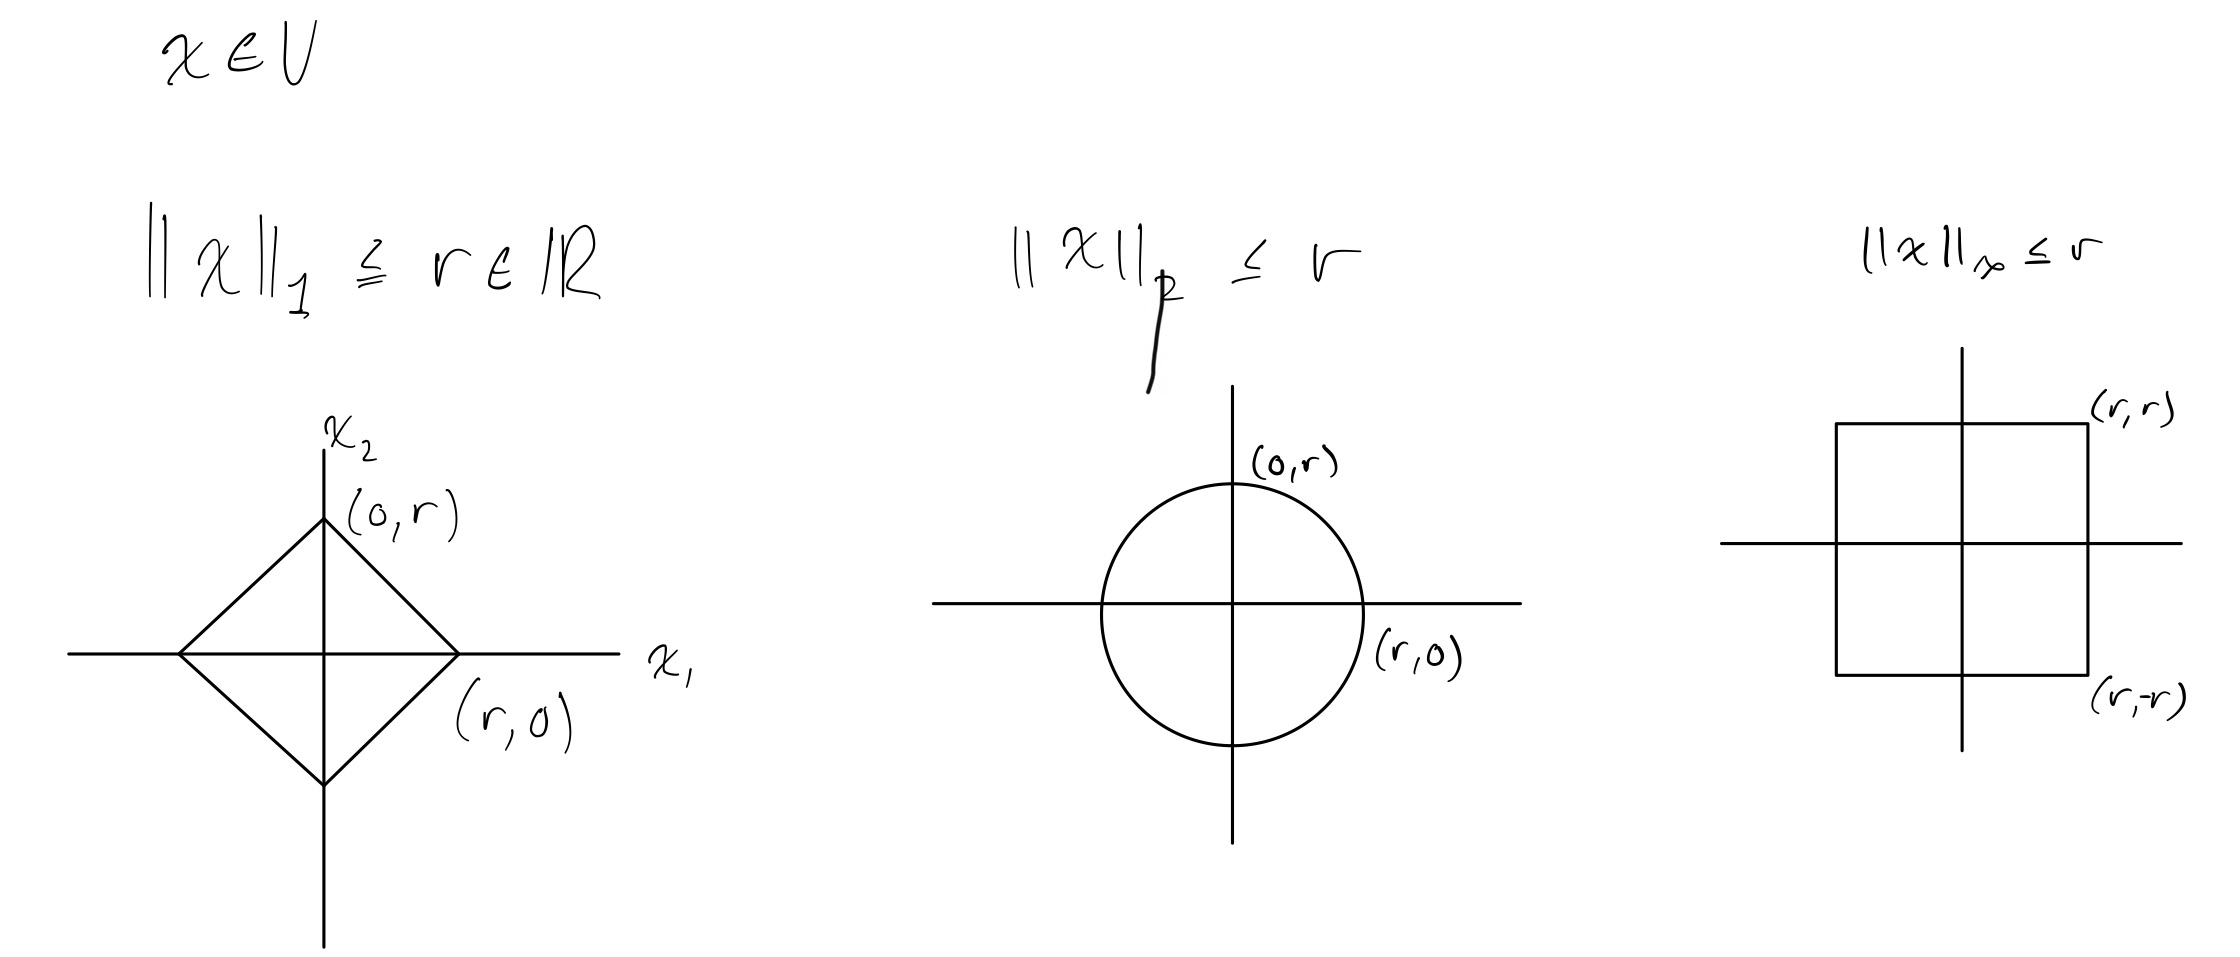
#### Problem 3
Assume {$f_n$} converges unimormly to $f$ in $[a,b]$. Then for all $\epsilon >0$ there exists N such that $$|f_n(x) - f(x)|<\epsilon$$ for all $x\in[a,b]$ and all $n>N$. Then $$lim_{n\rightarrow \infty} M_n = lim_{n\rightarrow \infty} \| f_n - f\|_\infty = \|lim_{n\rightarrow \infty} f_n - f\|_\infty = \|0\|_\infty = 0.$$
Next, assume $M_n$ converges to zero as $n \rightarrow \infty$. Then $$lim_{n\rightarrow \infty} M_n = lim_{n\rightarrow \infty} \|f_n(x) - f(x)\| = 0$$ for some arbitrary x. Then, for all $\epsilon>0$, there exists some $N$ such that for all $n>N$
$$ |M_n| < \epsilon \iff | \|f_n(x) - f(x)\| | < \epsilon \iff | \|f_n\|_\infty - \|f\|_\infty | <\epsilon$$
Thus, $|f_n(x) - f(x)| < \epsilon$ for all x and $n>N$.
#### Problem 4
(a) Fix $\epsilon > 0$ and choose $N = \frac{1}{\epsilon}$. Then:
$$|f_n(x)-f(x)| = |(\frac{n-1}{n})x^2 + \frac{x}{n} - x^2| = |\frac{1}{n}(x-x^2)| \leq \frac{1}{n} < \frac{1}{N} = \epsilon$$
for all $x\in[0,1]$ and $n>N$.

(b) Assume $f_n$ converges uniformly on $x\in[0,1]$. Then there exists a unique real number $L$ such that $lim_{n\rightarrow\infty} f_n = L$ for all $x\in[0,1]$. We show that when $x=0$, then $$lim_{n\rightarrow\infty} f_n(0) = lim_{n\rightarrow\infty} 0^n = 0.$$
But also notice that when $x=1$, then 
$$lim_{n\rightarrow\infty} f_n(1) = lim_{n\rightarrow\infty} 1^n = 1,$$ a contradiction. Therefore $f_n$ does not converge uniformly on the interval $x\in[0,1]$.

In [44]:
#Problem 5
#Bernstein Polynomial estimation

### PREAMBLE
### Code by Daniel Arredondo
### Last Edited 10/11/2019
### The code tries to approxiamte real continuous function by real polynomials.
import math as m

def f(x): #setting up python function to capture the given function of x
    if (x >= 0 and x <= 0.5):
        return (x)
    elif (x > 0.5 and x <= 1):
        return (1-x)

#Inputs: n and k for our factorial computation, order doesn't matter
#Outputs: Integer computation of n Choose k, or of the factorials
def nCk(n,k): #setting up the binomial coefficients for the Bernstein polynomial sum
        ## I set up nCk in a way that it will always output a number than return a 0 if n < k.
    fact = m.factorial
    return fact(max(n,k)) // (fact(min(n,k))*fact(max(n,k)-min(n,k)))

#print(nCk(12,4)==nCk(4,12))

#Inputs: n for degrees of Bernstein Polynomial approximation and our x that we are approximating towards
#Outputs: Our Bernstein polynomial approx.
def Bern(n,x):
    #stein = 0.5*(f(0)+f(1))
    n *= 2
    stein = 0
    for k in range(0,n+1):
        weight = f(k/n)
        bin_coef = nCk(n,k) # our binomial coefficients
        stein += weight * bin_coef * (x**(k)) * (1-x)**(n-k) 
            # our summation of [f(i/k) * nC(n,i) * t^k * (1-t)^(n-k)] 
    return stein

print ("Bern(1, x=.5) =", Bern(1,.5), \
       "\nBern(2, x=.5) =", Bern(2,.5), \
       "\nBern(4, x=.5) =", Bern(4,.5), \
       "\nBern(8, x=.5) =", Bern(8,.5), \
       "\nBern(16,x=.5) =", Bern(16,.5), \
       "\nBern(32,x=.5) =", Bern(32,.5), \
       "\nBern(64,x=.5) =", Bern(64,.5), \
       "\nBern(128,x=.5)=", Bern(128,.5)
      )


print ("\nOur rate of convergence between n=2 and n=3 for x = 0.5 is:\n", \
       (Bern(3, 0.5) - f(0.5)) / (Bern(2, .5) - f(0.5) ))
print ("\nOur rate of convergence between n=32 and n=33 for x = 0.5 is:\n", \
       (Bern(33, 0.5) - f(0.5)) / (Bern(32, .5) - f(0.5) ))

Bern(1, x=.5) = 0.25 
Bern(2, x=.5) = 0.3125 
Bern(4, x=.5) = 0.36328125 
Bern(8, x=.5) = 0.4018096923828125 
Bern(16,x=.5) = 0.4300250329542905 
Bern(32,x=.5) = 0.4503266231260165 
Bern(64,x=.5) = 0.46480695391499216 
Bern(128,x=.5)= 0.4750904450319302

Our rate of convergence between n=2 and n=3 for x = 0.5 is:
 0.8333333333333334

Our rate of convergence between n=32 and n=33 for x = 0.5 is:
 0.9279127756866247


#### Our rate of convergence is in (0,1), so it is linear.

#### Question 6

$P_1(x) = 20x(1-x)+x^{2}$ for $x\in[0,0.5]$

$P_2(x) = 20x(1+x)+x^{2}$ for $x\in[-0.5,0)$